In [3]:
import sys
sys.path.append('../src/')

from docopt import docopt
from Config import Config
from Builder import RepertoireBuilder

doc = """Usage:
    main.py <config_file>

Arguments:
    <config_file>   Path to YAML configuration file
"""


def main():
    config = Config("example.yaml")

    builder = RepertoireBuilder(config)
    return builder.GenerateReportoire()


In [4]:
df = main()


		START


( 0m0s )  -------  1   c2c4   Starting move 
 r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . P . . . . .
. . . . . . . .
P P . P P P P P
R N B Q K B N R


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df

,ply,move,IsWhiteToMove,whitePerc,drawPerc,blackPerc,totGames,percGames,engineEval
0,2,Nf6,False,49,5,44,8223912,24,0.29
1,3,Qc2,True,50,4,45,11793,0,-0.49
2,4,g6,False,46,4,48,4186,35,0.17
3,4,e6,False,53,3,42,2734,23,0.00
4,4,e5,False,51,3,44,1363,11,0.00
5,4,c5,False,51,4,44,1112,9,-0.37
6,4,d5,False,52,3,44,772,6,0.20
7,4,d6,False,48,3,48,584,4,0.32
8,2,e5,False,51,5,43,7955015,23,0.25
9,3,b3,True,50,4,44,120210,1,-0.23


In [ ]:
w = df[df['IsWhiteToMove']]
b = df[df['IsWhiteToMove'] == False]

([<matplotlib.axis.XTick at 0x12b64c1f0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

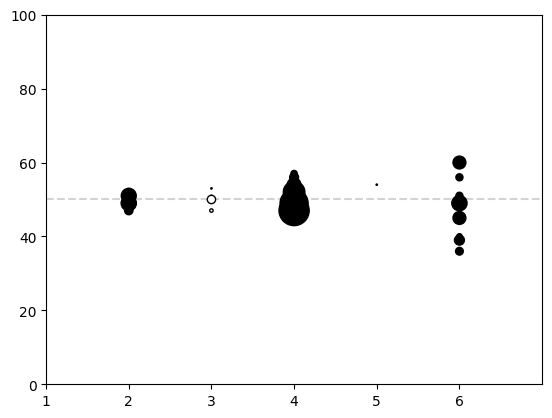

In [ ]:
# Aggiunta di una linea orizzontale al valore 0
linea = plt.axhline(50, color='lightgray', linestyle='--')
linea.set_zorder(-1)  # Imposta il valore di z-order per mettere la linea in secondo piano

# plt.scatter(w['ply'], w['whitePerc'], marker='o', edgecolors='black', facecolors='white',s=np.log10(w['totGames'])*50)
# plt.scatter(b['ply'], b['whitePerc'], marker='o', edgecolors='black', facecolors='black',s=np.log10(b['totGames'])*50)
plt.scatter(w['ply'], w['whitePerc'], marker='o', edgecolors='black', facecolors='white',s=w['percGames']*5+1)
plt.scatter(b['ply'], b['whitePerc'], marker='o', edgecolors='black', facecolors='black',s=b['percGames']*5+1)

plt.ylim(0,100)
plt.xlim(1,df['ply'].max()+1)
plt.xticks(np.arange(1, df['ply'].max()+1, 1))

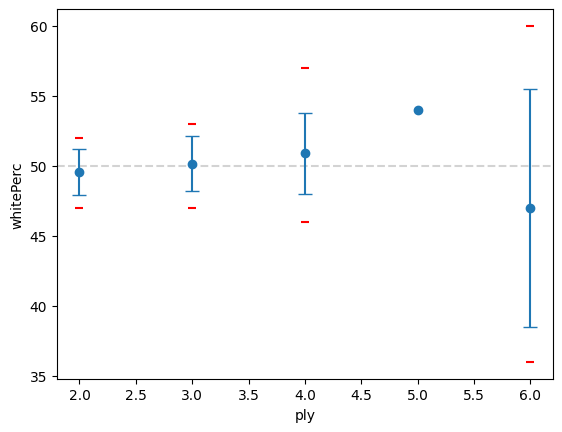

In [ ]:
grouped = df.groupby('ply')['whitePerc'].agg(['mean', 'min', 'max', 'count', 'std'])

linea = plt.axhline(50, color='lightgray', linestyle='--')

plt.errorbar(grouped.index, grouped['mean'], yerr=grouped['std'], fmt='o', capsize=5, label='Mean')
plt.scatter(grouped.index, grouped['min'], marker='_', color='r', label='Min')
plt.scatter(grouped.index, grouped['max'], marker='_', color='r', label='Max')

plt.xlabel('ply')
plt.ylabel('whitePerc')

plt.show()

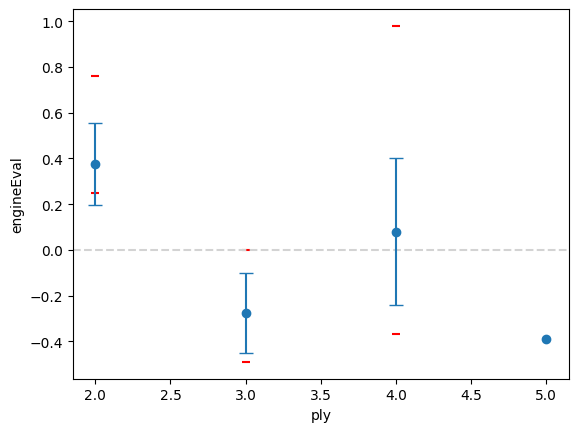

In [ ]:
grouped = df[df['engineEval'] > -10].groupby('ply')['engineEval'].agg(['mean', 'min', 'max', 'count', 'std'])

linea = plt.axhline(0, color='lightgray', linestyle='--')

plt.errorbar(grouped.index, grouped['mean'], yerr=grouped['std'], fmt='o', capsize=5, label='Mean')
plt.scatter(grouped.index, grouped['min'], marker='_', color='r', label='Min')
plt.scatter(grouped.index, grouped['max'], marker='_', color='r', label='Max')

plt.xlabel('ply')
plt.ylabel('engineEval')

plt.show()